In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
1.	What is your project topic?  Briefly summarize what you’re trying to accomplish
There are two main topics for this final project. In the first half, I will be comparing how well can Jeremy Lin fit into the NBA
given his stats last season played in CBA. In the second half, I will be building some models to predict the win rate 
in 2019-2020 CBA playoff by using the Jermey Lin's overall performance in the regular season

2.	What were the “results” of your work?  (What does your software package “do”, or what were the relevant evaluation metrics for your model, 
or what were the relationships between variables you were exploring, etc.)
The conclusion for the first half of the project is really fascinating. According to my k-means clustering analysis and based on 
the elbow method, I have divided my dataset into 5 random clusters. The result indicates that we can compare Jeremy Lin
to some PG that we all know like Derek Fisher and Zach LaVine. In the second half of the project, due to the limited data 
in my dataset, I conducted a random forest and logistic regression on the cba data. Although the accuracy is super low on both
methods, the top three important features for Jeremy Lin that have a high correlation with NBA are Steal, FT and FGA. 

3.	What would the next logical step be in this exploration?
The dataset in the first half of the project needs to be further updated because it has all the players from 1950 to 2017.
In order to make it easier, I only selected the players who were drafted after 2010 season. A logical step here would be finding
players from 2017 to the current season to make it relavant. Also, Jeremy Lin could play multiple positions, but not limited
to PG, so I could potentially use more players in the cluster analysis. 

4.	What did you find difficult to do during the project?
The difficulty for this project defnitely falls into the category of limited data. In the second half of the project, I had
to manually input the data for each game because China does not have an official website just like BasektballReference.com 
that has a well-developed place to store all the information. This process took me a long time to finish. In adition to that,
It's also challenging for me to find the stats for the players who played for NBA but later on joined CBA. The reason is the same as before.

5.	What topic did you wish you were more knowledgeable about/what would have been handy to know while you were doing the project?
I would wish to have more knowledge about how to implement the ELO score in Python/R as I believe it is a great topic 
to do for a project to predict a team's winning probability. 


In [10]:
#import the df 
#Part 1 K-means clustering analysis 
df = pd.read_csv (r'C:\Users\yinr1\Desktop\Sports Analytics\Final_nba1.csv') 

In [11]:
#examine the top 5 values
df.head()

,Player,PTS,TRB,AST,FGP,X3,FTP,STL,TOV,BLK
0,A.J. Price,5.530343,1.374025,2.064368,0.348028,0.239153,0.722427,0.397556,0.746855,0.021457
1,Aaron Brooks,9.193938,1.587726,3.123486,0.402260,0.355422,0.834051,0.585177,1.561181,0.162893
2,Acie Law,4.029361,0.838131,1.248065,0.421305,0.192262,0.752433,0.536944,0.709201,0.021368
3,Allen Iverson*,12.333333,1.333333,3.666667,0.576923,1.000000,0.500000,0.333333,2.333333,0.000000
4,Andre Miller,6.817064,2.234939,4.002147,0.504695,0.209487,0.778536,0.666249,1.510222,0.070964


In [25]:
#create a row for Jeremy Lin's data based on the prediction in R
#however, we could not retrieve any information in terms of Jermey's Steal, Turnover and Block. Therefore, I decide to 
# multipy 0.6 on his Steal stats in cba average, 1.2 on Turnover, and 0.6 on Block 
df2 = pd.DataFrame([['Jermey Lin',9.222329,2.606221,3.069829,0.42475,0.33153,0.82665,1.2571,4,0.242857]],
                    columns=['Player','PTS','TRB','AST','FGP','X3','FTP','STL','TOV','BLK'])

#concat these 2 dfs together
df3=pd.concat([df2,df],ignore_index=True)


In [32]:
df3.head()

,Player,PTS,TRB,AST,FGP,X3,FTP,STL,TOV,BLK
0,Jermey Lin,9.222329,2.606221,3.069829,0.424750,0.331530,0.826650,1.257100,4.000000,0.242857
1,A.J. Price,5.530343,1.374025,2.064368,0.348028,0.239153,0.722427,0.397556,0.746855,0.021457
2,Aaron Brooks,9.193938,1.587726,3.123486,0.402260,0.355422,0.834051,0.585177,1.561181,0.162893
3,Acie Law,4.029361,0.838131,1.248065,0.421305,0.192262,0.752433,0.536944,0.709201,0.021368
4,Allen Iverson*,12.333333,1.333333,3.666667,0.576923,1.000000,0.500000,0.333333,2.333333,0.000000


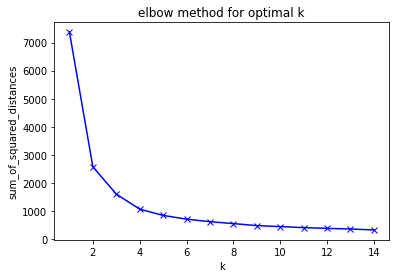

In [49]:
#decide how many clusters would be ideal in our scenario 
sum_of_squared_distances = []
num = range(1,15)
for k in num:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(clusters)
    sum_of_squared_distances.append(k_means.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [70]:
#looks like 5 is a good number to use 
kmeans_model = KMeans(n_clusters=5, random_state=1)
clusters = df3._get_numeric_data().dropna(axis=1)
kmeans_model.fit(clusters)
labels = kmeans_model.labels_
labels

array([4, 1, 4, 1, 2, 4, 3, 1, 1, 1, 3, 4, 1, 4, 4, 2, 3, 1, 4, 3, 1, 2,
       2, 1, 1, 3, 4, 1, 3, 1, 1, 3, 1, 1, 0, 1, 0, 3, 3, 1, 1, 1, 1, 2,
       4, 0, 1, 1, 1, 2, 1, 1, 1, 4, 3, 2, 4, 2, 0, 2, 3, 1, 1, 1, 3, 1,
       1, 4, 2, 3, 2, 2, 0, 1, 3, 1, 3, 3, 1, 1, 2, 0, 2, 2, 4, 4, 4, 3,
       0, 4, 1, 4, 1, 2, 2, 0, 3, 1, 2, 3, 4, 1, 1, 1, 2, 3, 2, 1, 1, 4,
       3, 4, 1, 3, 1, 0, 1, 4, 2, 4, 1, 3, 4, 3, 3, 2, 3, 3, 3, 1, 3, 0,
       1, 3, 1, 1, 1, 2, 0, 4, 1, 3, 4, 1, 3, 1, 2, 4, 1, 3, 1, 1, 1, 4,
       1, 4, 3, 4, 2, 4, 2, 1, 1, 2, 3, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1,
       4, 2, 4, 4, 1, 1, 2, 2, 2, 2, 4, 3, 1, 3, 0, 3, 4, 1, 4, 1, 1, 1,
       4, 4, 3, 1, 0, 4, 2, 1, 4, 4, 1, 4, 1, 2, 2, 3, 3, 4, 2, 1, 2, 4,
       3, 1, 2, 1, 1, 4, 3, 3, 3, 4, 1, 4])

In [71]:
#nice now we get the different clusters. Time to combine the clusters into our original df
temp = pd.DataFrame(data=labels, columns=["clusters"])
final_df = pd.concat([df3,temp],axis=1)
final_df.head()

,Player,PTS,TRB,AST,FGP,X3,FTP,STL,TOV,BLK,clusters
0,Jermey Lin,9.222329,2.606221,3.069829,0.424750,0.331530,0.826650,1.257100,4.000000,0.242857,4
1,A.J. Price,5.530343,1.374025,2.064368,0.348028,0.239153,0.722427,0.397556,0.746855,0.021457,1
2,Aaron Brooks,9.193938,1.587726,3.123486,0.402260,0.355422,0.834051,0.585177,1.561181,0.162893,4
3,Acie Law,4.029361,0.838131,1.248065,0.421305,0.192262,0.752433,0.536944,0.709201,0.021368,1
4,Allen Iverson*,12.333333,1.333333,3.666667,0.576923,1.000000,0.500000,0.333333,2.333333,0.000000,2


In [75]:
#now we want to see who is in cluster 4 like Jermey Lin 
final_df.query('clusters==4').head()

,Player,PTS,TRB,AST,FGP,X3,FTP,STL,TOV,BLK,clusters
0,Jermey Lin,9.222329,2.606221,3.069829,0.424750,0.331530,0.826650,1.257100,4.000000,0.242857,4
2,Aaron Brooks,9.193938,1.587726,3.123486,0.402260,0.355422,0.834051,0.585177,1.561181,0.162893,4
5,Andre Miller,6.817064,2.234939,4.002147,0.504695,0.209487,0.778536,0.666249,1.510222,0.070964,4
11,Archie Goodwin,8.859649,2.491228,2.070175,0.417062,0.232323,0.673575,0.473684,1.754386,0.228070,4
13,Austin Rivers,7.389360,1.959173,1.988689,0.416035,0.336139,0.608828,0.691941,0.984800,0.150583,4


In [78]:
#Part 2 Predicting CBA's playoff winrate
lin = pd.read_excel (r'C:\Users\yinr1\Desktop\Sports Analytics\Jeremy Lin.xlsx', sheet_name='lin')
lin

In [84]:
#train set would be Playoff status is 0
#test set would be Playoff status is 1
lin_train =lin.loc[lin['PF.1'] == 0]
lin_test = lin.loc[lin['PF.1']==1]
lin_train.head()

,Game,PTS,Rebound,Assist,FG,FGA,3P,3PA,FT,FTA,ST,TOV,BLK,PF,W,PF.1,covid
0,1,25,6,9,7,18,0,5,11,12,2,4,0,4,1,0,0
1,2,24,8,6,6,16,2,5,10,12,1,3,0,3,1,0,0
2,3,26,7,4,12,19,0,2,2,4,3,5,1,4,1,0,0
3,4,27,7,6,8,20,0,3,11,13,1,5,0,4,1,0,0
4,5,28,5,9,8,19,4,10,8,8,4,4,0,2,0,0,0


In [85]:

import numpy as np

labels_train = np.array(lin_train['W'])
labels_test = np.array(lin_test['W'])

features_train= np.array(lin_train.drop('W', axis = 1))
features_test = np.array(lin_test.drop('W',axis=1))


In [93]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 1000, random_state = 20)

rf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [96]:
y_pred = rf.predict(features_test)


array([1, 1, 1, 1], dtype=int64)

In [95]:

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(labels_test, y_pred))

Accuracy: 0.5


In [100]:
lin.columns

Index(['Game', 'PTS', 'Rebound ', 'Assist ', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ST', 'TOV', 'BLK', 'PF', 'W', 'PF.1', 'covid'],
      dtype='object')

In [103]:
feature_imp = pd.Series(rf.feature_importances_,index=lin.drop(['W'],axis=1).columns).sort_values(ascending=False)
feature_imp

ST          0.180545
FT          0.116502
FGA         0.088715
Game        0.088009
Rebound     0.084591
FTA         0.080391
3PA         0.057247
TOV         0.053690
PTS         0.052817
PF          0.048572
Assist      0.046576
FG          0.034197
BLK         0.029861
3P          0.025956
covid       0.012332
PF.1        0.000000
dtype: float64

No handles with labels found to put in legend.


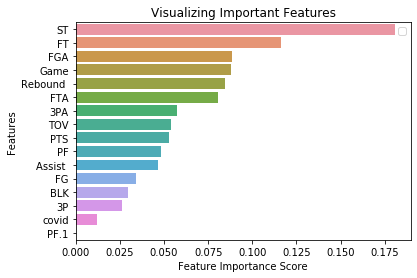

In [104]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [105]:
#lets try logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(features_train, labels_train)

C:\Users\yinr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred = logreg.predict(features_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(features_test, labels_test)))

Accuracy of logistic regression classifier on test set: 0.25


In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(labels_test, logreg.predict(features_test))
fpr, tpr, thresholds = roc_curve(labels_test, logreg.predict_proba(features_test)[:,1])
thresholds

array([1.87022821, 0.87022821, 0.75135044, 0.66728153, 0.12691537])

array([1, 0, 1, 0], dtype=int64)